In [276]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import ceil

In [277]:
data = pd.read_csv("fods_1.csv").to_numpy()

In [278]:
# training_data = data.sample(frac = 0.8)
# test_data = data.drop(training_data.index)
np.random.shuffle(data)
N = data.shape[0]
N_train = ceil(N * 0.8)
N_test = N - N_train
X_train = data[:N_train,0:2]
y_train = data[:N_train,2]
X_test = data[N_train:,0:2]
y_test = data[N_train:,2]

In [284]:
def genFeatureMatrix(X, degree):

    mat = np.ones([1,len(X[0])])
            
    return mat

In [285]:
Y = y_train.T

X = genFeatureMatrix(X_train, 2).T
# X = np.concatenate((np.ones([1, len(X[0])]), X), axis = 0)

W = np.zeros([len(X), 1])

Y.shape, X.shape, W.shape

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
def lossFunction(Y, X, W):
    return 1 / (2 * len(X[0])) * np.sum(np.power((Y - W.T @ X), 2))

In [ ]:
def gradientDescent(Y, X, W):
    
    alpha = 0.1
    iterations = 1000
    N = len(X[0])
    cost = np.zeros(iterations)

    for i in range(iterations):
        W = W + (alpha / N)*((Y - W.T @ X) @ X.T).T
        cost[i] = lossFunction(Y, X, W)
    
    return W, cost

In [ ]:
W_grad, cost_grad = gradientDescent(Y, X, W)
cost_grad[len(cost_grad) - 1]

0.915997727803899

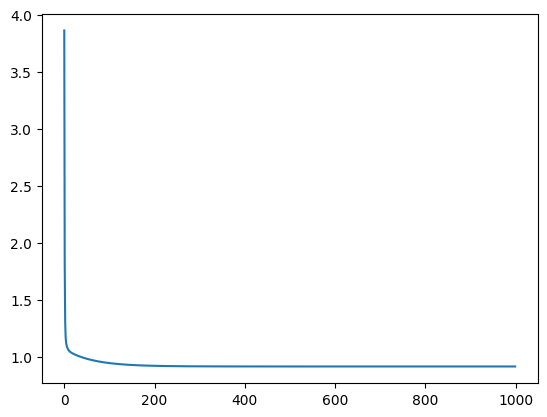

In [ ]:
grad_descent_graph = np.array([i for i in range (len(cost_grad))])
plt.plot(grad_descent_graph, cost_grad)
plt.show()